In [1]:
from ipypublish.scripts import nb_setup

In [2]:
#Reading PARAM input and mode_output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
import math
import sys
sys.path.append('/home/thaise/Libraries/Python/parampy/')

import parampy as pf


In [3]:
# Redefine figure default parameters:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          #'figure.figsize': (15, 5),
         'axes.labelsize': 'xx-large',
         'axes.titlesize':'xx-large',
         'axes.linewidth':'1.5',
          
         'xtick.labelsize':'x-large',
         'xtick.major.size':'5',
         'xtick.major.width':'2',
          
         'ytick.labelsize':'x-large',
         'ytick.major.width':'2',
         'ytick.major.size':'5',
                  
         'figure.subplot.wspace':'0.4',
         'figure.subplot.wspace':'0.4'
         }
pylab.rcParams.update(params)
#pylab.rcParams.keys()

In [4]:
# To make table to be printed with ipypublish
# because metadata "table" is not working!!!
from IPython.display import display

def make_table(df):
    latex = df.to_latex(escape=False, index=False) # escape is to understand latex command
    html = df.to_html()
    metadata={'text/latex': latex,
            'text/html': html}
              #'ipub': {
      #'table': {
        #'caption': 'Bla '}}}
 
    return display(metadata, raw=True)

In [5]:
# Reading tracks:
pd.set_option("display.max_columns", None)
parsec_3 = pf.read_tracks("track_files/parsec_fixINT2_fixCNO_m0.6_2.0_0.0002_0.034.trac2")
mesa_diff_3 = pf.read_tracks("track_files/mesa_diff_fixINT2_fixCNO_m0.6_2.0_0.0002_0.034.trac2")

# Reading table with Z, Y, FeH from tracks:
parsec_tab = pd.read_csv('PARSEC_V1.2s_M36_S12D_NS_MAS3_Z_Y_FeH.txt', sep=" ").sort_values(['Z'])
mesa_tab= pd.read_csv('MESA_DIFF_FEHFIX_FIXY_Z_Y_FeH.txt', sep=" ").sort_values(['Z'])

In [6]:
# Computing X
for tab in (parsec_tab, mesa_tab):
    tab['X'] = 1.0 - tab.Z - tab.Y

In [7]:
# Creating tables of interpolated X, Z, Y, FeH ini:
parsec_int = pd.DataFrame()
mesa_int = pd.DataFrame()
for z in parsec_3.index.get_level_values('Zini').unique():
    parsec_int = parsec_int.append({'X' : parsec_3.query('Zini==@z and Mini==0.8 and n==1')['Xini'].values[0],
                                   'Y': parsec_3.query('Zini==@z and Mini==0.8 and n==1')['Yini'].values[0],
                                   'Z': parsec_3.query('Zini==@z and Mini==0.8 and n==1')['Zini_st'].values[0],
                                   'FeH': parsec_3.query('Zini==@z and Mini==0.8 and n==1')['FeHini'].values[0]},
                                   ignore_index=True).sort_values(['Z'])
    mesa_int = mesa_int.append({'X' : mesa_diff_3.query('Zini==@z and Mini==0.8 and n==1')['Xini'].values[0],
                                'Y': mesa_diff_3.query('Zini==@z and Mini==0.8 and n==1')['Yini'].values[0],
                                'Z': mesa_diff_3.query('Zini==@z and Mini==0.8 and n==1')['Zini_st'].values[0],
                                'FeH': mesa_diff_3.query('Zini==@z and Mini==0.8 and n==1')['FeHini'].values[0]},
                               ignore_index=True).sort_values(['Z'])

# Interpolation of $X$, $Y$, and $Z$

Every grid contains a value of Helium $Y$, and metal $Z$ mass fraction, metallicity [Fe/H], and several evolutionary tracks. Every point in a track contains also information about surface Hydrogen $X_\mathrm{act}$ and Helium $Y_\mathrm{act}$ content. Let's consider two grids: grid 1 and 2 with initial mass fraction $Y_\mathrm{ini1}$, $Z_\mathrm{ini1}$, $Y_\mathrm{ini2}$, and $Z_\mathrm{ini2}$, where $Z\mathrm{ini1} < Z_\mathrm{ini2}$. For a given value of $Z_\mathrm{input}$, weights $f$ and $f_1$ are computed in logarithm $Z$:

\begin{equation}
Z_\mathrm{ini} = Z_\mathrm{input}
\nonumber
\end{equation}

\begin{equation}
f = \frac{\log{Z_\mathrm{ini}}- \log{Z_1}}{\log{Z_2} - \log{Z_1}}; \quad\quad  f_1 = 1 - f
\nonumber
\end{equation}

then interpolated $X_\mathrm{ini}$ and $Y_\mathrm{ini}$ are derived:

\begin{equation}
X_\mathrm{ini} = \left( f_1 \frac{X_\mathrm{ini1}}{(1-Z_\mathrm{ini1})} + f \frac{X_\mathrm{ini2}}{(1-Z_\mathrm{ini2})} \right) (1-Z_\mathrm{ini})
\\
Y_\mathrm{ini} = \left( f_1 \frac{Y_\mathrm{ini1}}{(1-Z_\mathrm{ini1})} + f \frac{Y_\mathrm{ini2}}{(1-Z_\mathrm{ini2})} \right) (1-Z_\mathrm{ini}).
\nonumber
\end{equation}

In this way the sum $X+Y+Z$ is equal to 1.

Similar interpolations are done for $X_\mathrm{act}$ and $Y_\mathrm{act}$, where $Z_\mathrm{act}$ is:

\begin{equation}
Z_\mathrm{act} = 10^{(f_1 \log{Z_\mathrm{act1}} + f \log{Z_\mathrm{act2}})}.
\nonumber
\end{equation}

and 

\begin{equation}
Z_\mathrm{act1} = 1 - X_\mathrm{act1} -Y_\mathrm{act1}; \quad\quad
Z_\mathrm{act2} = 1 - X_\mathrm{act2} -Y_\mathrm{act2}.
\nonumber
\end{equation}


Tables \ref{tab:parsec_tab} and \ref{tab:mesa_tab} show $Z$, $X$, $Y$, and [Fe/H] values for PARSEC and MESA (with element diffusion) grids.

In [8]:
make_table(parsec_tab[['Z', 'X', 'Y', 'FeH']].rename({'Z':'$Z_\mathrm{ini}$', 'X':'$X_\mathrm{ini}$', 'Y':'$Y_\mathrm{ini}$','FeH':'[Fe/H]'},
                                                     axis=1, copy=False))

$Z_\mathrm{ini}$ 
 $X_\mathrm{ini}$ 
 $Y_\mathrm{ini}$ 
 [Fe/H] 
 
 
 
 
 0 
 0.0001 
 0.7509 
 0.249 
 -2.191552 
 
 
 1 
 0.0002 
 0.7508 
 0.249 
 -1.890465 
 
 
 2 
 0.0005 
 0.7505 
 0.249 
 -1.492351 
 
 
 3 
 0.0010 
 0.7490 
 0.250 
 -1.190452 
 
 
 4 
 0.0020 
 0.7460 
 0.252 
 -0.887679 
 
 
 5 
 0.0040 
 0.7400 
 0.256 
 -0.583142 
 
 
 6 
 0.0060 
 0.7350 
 0.259 
 -0.404106 
 
 
 7 
 0.0080 
 0.7290 
 0.263 
 -0.275608 
 
 
 8 
 0.0100 
 0.7230 
 0.267 
 -0.175109 
 
 
 9 
 0.0140 
 0.7130 
 0.273 
 -0.022932 
 
 
 10 
 0.0170 
 0.7040 
 0.279 
 0.066906 
 
 
 11 
 0.0200 
 0.6960 
 0.284 
 0.142450 
 
 
 12 
 0.0300 
 0.6680 
 0.302 
 0.336374 
 
 
 13 
 0.0400 
 0.6390 
 0.321 
 0.480589 
 
 
 14 
 0.0600 
 0.5840 
 0.356 
 0.695768

In [9]:
make_table(mesa_tab[['Z', 'X', 'Y', 'FeH']].rename({'Z':'$Z_\mathrm{ini}$', 'X':'$X_\mathrm{ini}$', 'Y':'$Y_\mathrm{ini}$','FeH':'[Fe/H]'},
                                                   axis=1, copy=False))

$Z_\mathrm{ini}$ 
 $X_\mathrm{ini}$ 
 $Y_\mathrm{ini}$ 
 [Fe/H] 
 
 
 
 
 0 
 0.00020 
 0.75104 
 0.24876 
 -1.9638 
 
 
 1 
 0.00197 
 0.74697 
 0.25106 
 -0.9680 
 
 
 2 
 0.01105 
 0.72608 
 0.26287 
 -0.2068 
 
 
 3 
 0.01965 
 0.70629 
 0.27406 
 0.0563 
 
 
 4 
 0.03495 
 0.67109 
 0.29396 
 0.3269

In [10]:
# Linear Regression - training and predicting X vs Z
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

tabs = (parsec_tab, mesa_tab)
tests = (parsec_int, mesa_int)
for tab, test in zip(tabs, tests):
    # TRAIN
    X_train = pd.DataFrame(data={'cte': 1, 'Z' : tab.Z})
    X_train = X_train[['cte', 'Z']]
    y_train = tab.X

    # TEST
    X_test = pd.DataFrame({'cte': 1.0, 'Z' : test.Z})
    X_test = X_test[['cte', 'Z']]
    y_test = pd.DataFrame({'X' : test.X})

    # Create linear regression object
    lm = linear_model.LinearRegression()

    # Train the model using the training sets
    model = lm.fit(X_train,y_train)

    # Make predictions using the testing set
    y_pred = lm.predict(X_test)
    test['Xpred'] = y_pred

    # The coefficients and intercept
    print('Coefficients: ', lm.coef_)
    print('Intercep: ', lm.intercept_)
    # The mean squared error
    print("Mean squared error: ",   mean_squared_error(y_test, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('R^2: ',  r2_score(y_test, y_pred))
    print('\n')
   

Coefficients:  [ 0.         -2.79520164]
Intercep:  0.7515345939686033
Mean squared error:  1.0156496906862345e-07
R^2:  0.9998833615471807


Coefficients:  [ 0.         -2.30076802]
Intercep:  0.7515016173733184
Mean squared error:  1.3410696771859923e-06
R^2:  0.9977513470556849




Figures \ref{fig:Xini_Zini} and \ref{fig:Yini_Zini} show $X_\mathrm{ini}$-$Z_\mathrm{ini}$ and $Y_\mathrm{ini}$-$Z_\mathrm{ini}$ relations with grid and interpolated values in black and orange filled circles, respectively. The gray line in each panel is the linear regression using grid values. For PARSEC and MESA grids, these relations are given in equations \ref{eq:XY_parsec} and \ref{eq:XY_mesa}, with $R^2 \sim 0.999$ and $\sim 0.993$, respectively.

\begin{equation}\label{eq:XY_parsec}
X_\mathrm{ini} = -2.7952 Z_\mathrm{ini} + 0.7515 \\
Y_\mathrm{ini} = 1.7952 Z_\mathrm{ini} + 0.2485
\end{equation}


\begin{equation}\label{eq:XY_mesa}
X_\mathrm{ini} = -2.3001 Z_\mathrm{ini} + 0.7515  \\
Y_\mathrm{ini} = 1.3001 Z_\mathrm{ini} + 0.2485
\end{equation}



$X_\mathrm{ini}$-$Z_\mathrm{ini}$ relations for PARSEC (top) and MESA (bottom panel) with grid and some interpolated values in black and orange filled circles, respectively. The gray line is the linear regression of the grid values.

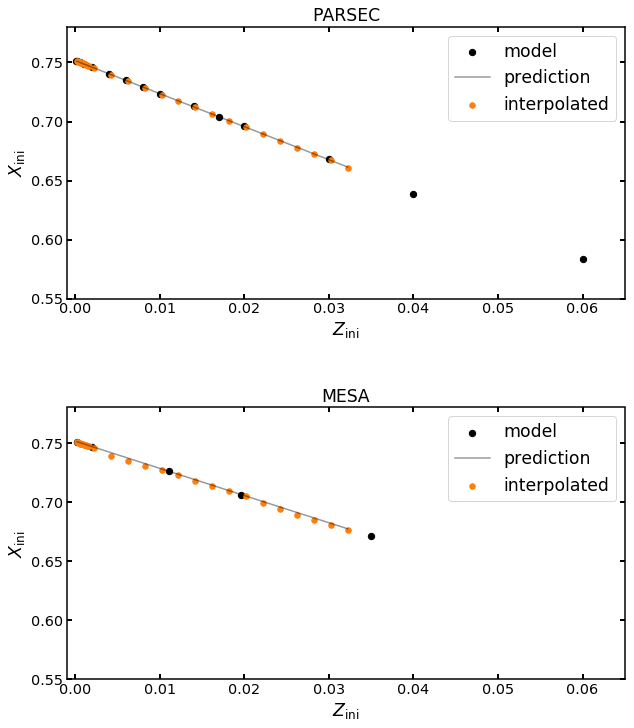

In [11]:
fig, axs = plt.subplots(2, 1, figsize=(10, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax=axs[0]
parsec_tab.plot.scatter('Z', 'X', ax=ax, color='black', s=40, label='model')
parsec_int.plot('Z', 'Xpred', ax=ax, color='black', alpha=0.4, label='prediction')
parsec_int.plot.scatter('Z', 'X', ax=ax, color='C1', label='interpolated', s=30)

ax.set_title('PARSEC')

ax=axs[1]
mesa_tab.plot.scatter('Z', 'X', ax=ax, color='black', s=40, label='model')
mesa_int.plot('Z', 'Xpred', ax=ax, color='black', alpha=0.4, label='prediction')
mesa_int.plot.scatter('Z', 'X', ax=ax, color='C1', label='interpolated', s=30)
#ax.plot(mesa_int.Z, (0.75150161-2.30076802*mesa_int.Z), color='red', alpha=0.4, label='prediction')

ax.set_title('MESA')

for ax in axs:
    ax.set_xlabel('$Z_\mathrm{ini}$')
    ax.set_ylabel('$X_\mathrm{ini}$')
    ax.tick_params(axis='both', direction='in', top=True, right=True)
    ax.set_xlim([-0.001, 0.065])
    ax.set_ylim([0.55,0.78])
plt.show()

In [12]:
# Linear Regression - training and predicting Y vs Z
tabs = (parsec_tab, mesa_tab)
tests = (parsec_int, mesa_int)
for tab, test in zip(tabs, tests):
    # TRAIN
    X_train = pd.DataFrame(data={'cte': 1, 'Z' : tab.Z})
    X_train = X_train[['cte', 'Z']]
    y_train = tab.Y

    # TEST
    X_test = pd.DataFrame({'cte': 1.0, 'Z' : test.Z})
    X_test = X_test[['cte', 'Z']]
    y_test = pd.DataFrame({'Y' : test.Y})

    # Create linear regression object
    lm = linear_model.LinearRegression()

    # Train the model using the training sets
    model = lm.fit(X_train,y_train)

    # Make predictions using the testing set
    y_pred = lm.predict(X_test)
    test['Ypred'] = y_pred

    # The coefficients and intercept
    print('Coefficients: ', lm.coef_)
    print('Intercep: ', lm.intercept_)
    # The mean squared error
    print("Mean squared error: ",   mean_squared_error(y_test, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('R^2: ',  r2_score(y_test, y_pred))
    print('\n')
   

Coefficients:  [0.         1.79520164]
Intercep:  0.24846540603139655
Mean squared error:  1.0156924663898256e-07
R^2:  0.9997188347173761


Coefficients:  [0.         1.30076802]
Intercep:  0.24849838262668156
Mean squared error:  1.3410503170523115e-06
R^2:  0.9930832544841695




Same as \ref{fig:Xini_Zini}, but for $Y_\mathrm{ini}$-$Z_\mathrm{ini}$ relation.

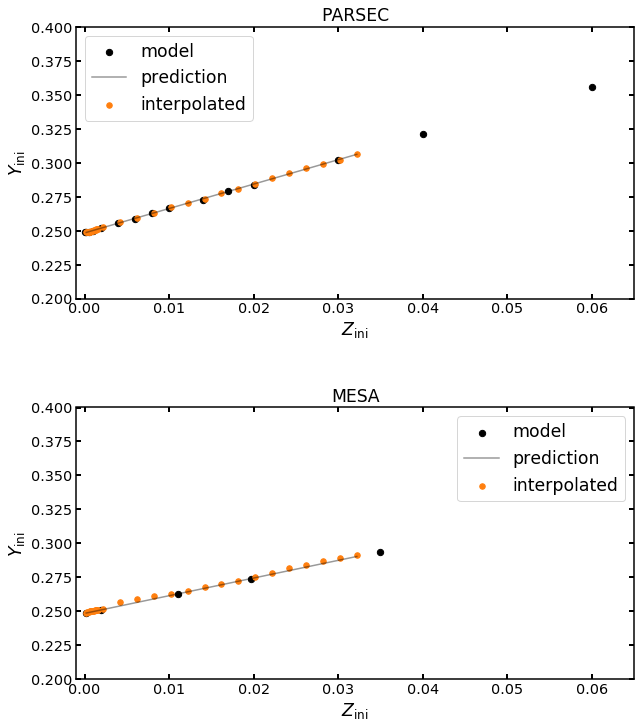

In [13]:
# 
fig, axs = plt.subplots(2, 1, figsize=(10, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax=axs[0]
parsec_tab.plot.scatter('Z', 'Y', ax=ax, color='black', s=40, label='model')
parsec_int.plot('Z', 'Ypred', ax=ax, color='black', alpha=0.4, label='prediction')
parsec_int.plot.scatter('Z', 'Y', ax=ax, color='C1', label='interpolated', s=30)

ax.set_title('PARSEC')

ax=axs[1]
mesa_tab.plot.scatter('Z', 'Y', ax=ax, color='black', s=40, label='model')
mesa_int.plot('Z', 'Ypred', ax=ax, color='black', alpha=0.4, label='prediction')
mesa_int.plot.scatter('Z', 'Y', ax=ax, color='C1', label='interpolated', s=30)

ax.set_title('MESA')

for ax in axs:
    ax.set_xlabel('$Z_\mathrm{ini}$')
    ax.set_ylabel('$Y_\mathrm{ini}$')
    ax.tick_params(axis='both', direction='in', top=True, right=True)
    ax.set_xlim([-0.001, 0.065])
    ax.set_ylim([0.2,0.4])
plt.show()

In [14]:
# Computing predicted - interpolated
tests = (parsec_int, mesa_int)
for test in tests:
    test['diffX'] = test.Xpred - test.X
    test['diffY'] = test.Ypred - test.Y

Figures \ref{fig:diffXini_Zini} and \ref{fig:diffYini_Zini} show absolute differences between the predicted and interpolated values of $X_\mathrm{ini}$ and $Y_\mathrm{ini}$ in function of $Z_\mathrm{ini}$, respectively, for PARSEC and MESA grids. The gray line is the identity line. Differences can be in the order of $10^{-3}$.

Absolute differences between the predicted and interpolated values of $X_\mathrm{ini}$ and $Y_\mathrm{ini}$ in function of $Z_\mathrm{ini}$ for PARSEC and MESA grids. The gray line is the identity line.

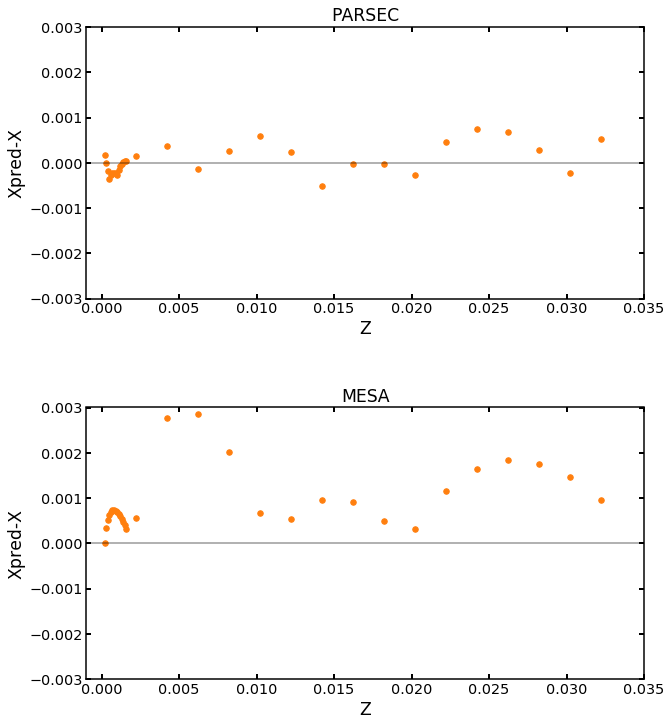

In [15]:
fig, axs = plt.subplots(2, 1, figsize=(10, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax=axs[0]
#parsec_tab.plot.scatter('Z', 'diffX', ax=ax, color='black', s=40, label='model')
ax.plot([-1,1], [0,0], color='black', alpha=0.4, label='prediction')
parsec_int.plot.scatter('Z', 'diffX', ax=ax, color='C1', s=30)

ax.set_title('PARSEC')

ax=axs[1]
#mesa_tab.plot.scatter('Z', 'X', ax=ax, color='black', s=40, label='model')
#mesa_int.plot('Z', 'Xpred', ax=ax, color='black', alpha=0.4, label='prediction')
ax.plot([-1,1], [0,0], color='black', alpha=0.4, label='prediction')
mesa_int.plot.scatter('Z', 'diffX', ax=ax, color='C1', s=30)

ax.set_title('MESA')

for ax in axs:
    ax.tick_params(axis='both', direction='in', top=True, right=True)
    ax.set_xlim([-0.001, 0.035])
    ax.set_ylim([-0.003,0.003])
    ax.set_ylabel('Xpred-X')
plt.show()

Same as \ref{fig:diffXini_Zini}, but for absolute differences in $Y_\mathrm{ini}$.

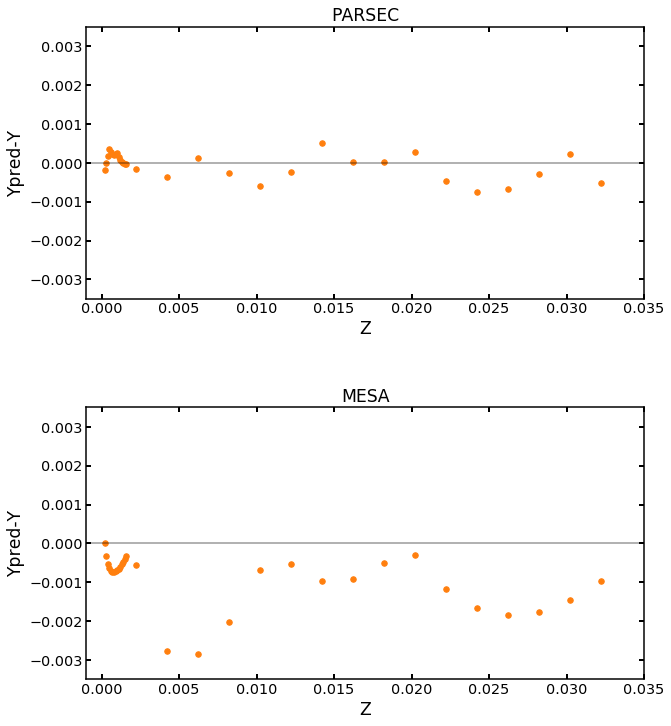

In [16]:
fig, axs = plt.subplots(2, 1, figsize=(10, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax=axs[0]
#parsec_tab.plot.scatter('Z', 'diffX', ax=ax, color='black', s=40, label='model')
ax.plot([-1,1], [0,0], color='black', alpha=0.4, label='prediction')
parsec_int.plot.scatter('Z', 'diffY', ax=ax, color='C1', s=30)

ax.set_title('PARSEC')

ax=axs[1]
#mesa_tab.plot.scatter('Z', 'X', ax=ax, color='black', s=40, label='model')
#mesa_int.plot('Z', 'Xpred', ax=ax, color='black', alpha=0.4, label='prediction')
ax.plot([-1,1], [0,0], color='black', alpha=0.4, label='prediction')
mesa_int.plot.scatter('Z', 'diffY', ax=ax, color='C1', s=30)

ax.set_title('MESA')

for ax in axs:
    ax.tick_params(axis='both', direction='in', top=True, right=True)
    ax.set_xlim([-0.001, 0.035])
    ax.set_ylim([-0.0035,0.0035])
    ax.set_ylabel('Ypred-Y')
plt.show()

In [17]:
# Reading tracks from models:
pd.set_option("display.max_columns", None)
parsec_mod = pf.read_tracks("track_files/parsec_output_tracks.txt")
mesa_diff_mod = pf.read_tracks("track_files/mesa_diff_output_tracks.txt")

Figures \ref{fig:Xact_Zact_mod1} and \ref{fig:Xact_Zact_mod2} show $X_\mathrm{act}$-$Z_\mathrm{act}$ relations for model tracks. The black filled circles are $X_\mathrm{ini}$ and $Z_\mathrm{ini}$ grid values. Filled circles color-coded by evolutionary stage are track points with 1.0 and 1.8 $M_\odot$, respectively. The gray line in each panel is the linear regression using grid values. The green filled circles represent the first point of each evolutionary track.

$X_\mathrm{act}$-$Z_\mathrm{act}$ relations for model tracks. The black filled circles are initial $X$ and $Z$ grid values. Filled circles color-coded by evolutionary stage are track points with 1.0 $M_\odot$. The gray line is the linear regression using grid values. The green filled circles represent the first point of each evolutionary track. Purple, cyan, and red filled circles are main sequence, sub-giant, and red giant phases. Note that MESA tracks do not have the sub-giant label.

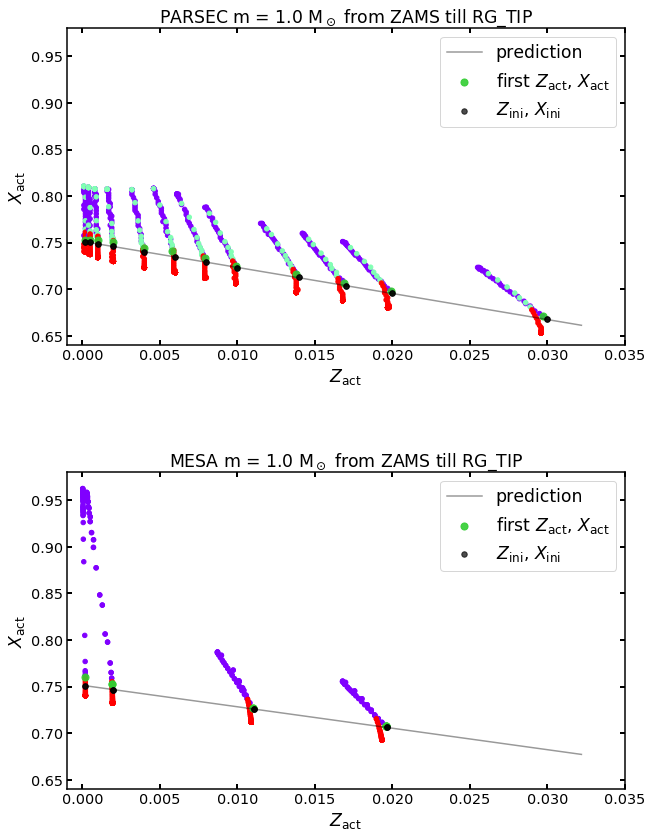

In [18]:
fig, axs = plt.subplots(2, 1, figsize=(10, 14))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

cm = plt.get_cmap('rainbow')

ax=axs[0]
parsec_mod[parsec_mod.label.isin([1,2,3])].query('Mini==1.0').plot.scatter('Zact_st', 'X', ax=ax,
                                                                       c='label', cmap=cm, vmin=1, vmax=3,
                                                                       colorbar=False) #n==80 and 

parsec_int.plot('Z', 'Xpred', ax=ax, color='black', alpha=0.4, label='prediction')

lab = 'first $Z_\mathrm{act}$, $X_\mathrm{act}$'
i=0
leg=True
for z in parsec_mod.index.get_level_values('Zini').unique():
    if (i>0):
        lab = ''
        leg = False
    parsec_mod.query('label==1 and Mini==1.0 and Zini==@z').iloc[0:1 , :].plot.scatter('Zact_st', 'X',
                                                                                     c='limegreen',
                                                                                     s=50, ax=ax, alpha=0.9,
                                                                                     label=lab, legend=leg)

    i+=1
    
parsec_mod.query('n==1 and Mini==1.0').plot.scatter('Zini_st', 'Xini', c='black',
                                                  s=30, ax=ax, alpha=0.7,
                                                 label='$Z_\mathrm{ini}$, $X_\mathrm{ini}$')

ax.set_title('PARSEC m = 1.0 M$_\odot$ from ZAMS till RG_TIP')

ax=axs[1]
mesa_diff_mod[mesa_diff_mod.label.isin([1,2,3])].query('Mini==1.0').plot.scatter('Zact_st', 'X', ax=ax,
                                                                       c='label', cmap=cm, vmin=1, vmax=3,
                                                                       colorbar=False) #n==80 and 

mesa_int.plot('Z', 'Xpred', ax=ax, color='black', alpha=0.4, label='prediction')

lab = 'first $Z_\mathrm{act}$, $X_\mathrm{act}$'
i=0
leg=True
for z in mesa_diff_mod.index.get_level_values('Zini').unique():
    if (i>0):
        lab = ''
        leg = False
    mesa_diff_mod.query('Mini==1.0 and Zini==@z and age==0.0 and label<3').plot.scatter('Zact_st', 'X',
                                                                                     c='limegreen',
                                                                                     s=50, ax=ax, alpha=0.9,
                                                                                     label=lab, legend=leg)
#.iloc[0:1 , :]
    i+=1
    
mesa_diff_mod.query('Mini==1.0 and Zini==@z and age==0.0 and label<3').plot.scatter('Zact_st', 'X',
                                                                                     c='limegreen',
                                                                                     s=50, ax=ax, alpha=0.9,
                                                                                     label=lab, legend=leg)


#mesa_diff_mod.query('n==1 and Mini==1.0').plot.scatter('Zact_st', 'X', c='limegreen',
#                                                     s=50, ax=ax, alpha=0.9,
#                                                   label='first $Z_\mathrm{act}$, $X_\mathrm{act}$')
mesa_diff_mod.query('n==1 and Mini==1.0').plot.scatter('Zini_st', 'Xini', c='black',
                                                     s=30, ax=ax, alpha=0.7,
                                                    label='$Z_\mathrm{ini}$, $X_\mathrm{ini}$')

ax.set_title('MESA m = 1.0 M$_\odot$ from ZAMS till RG_TIP')

for ax in axs:
    ax.tick_params(axis='both', direction='in', top=True, right=True)
    ax.set_xlim([-0.001, 0.035])
    ax.set_ylim([0.64,0.98])
    ax.set_ylabel('$X_\mathrm{act}$')
    ax.set_xlabel('$Z_\mathrm{act}$')
plt.show()

Same as \ref{fig:Xact_Zact_mod1}, but for tracks with 1.8 $M_\odot$.

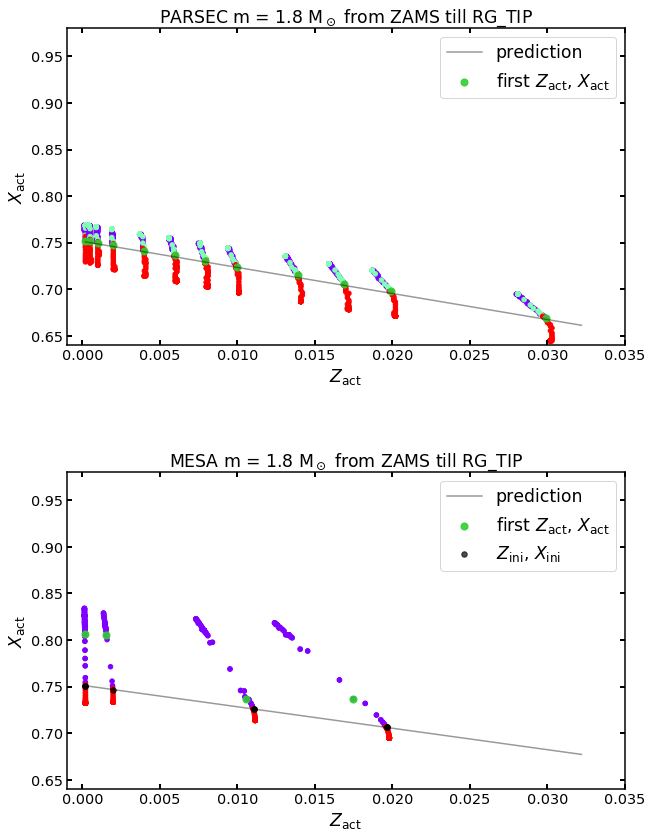

In [19]:
fig, axs = plt.subplots(2, 1, figsize=(10, 14))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

cm = plt.get_cmap('rainbow')

ax=axs[0]
parsec_mod[parsec_mod.label.isin([1,2,3])].query('Mini==1.8').plot.scatter('Zact_st', 'X', ax=ax,
                                                                       c='label', cmap=cm, vmin=1, vmax=3,
                                                                       colorbar=False) #n==80 and 

parsec_int.plot('Z', 'Xpred', ax=ax, color='black', alpha=0.4, label='prediction')

lab = 'first $Z_\mathrm{act}$, $X_\mathrm{act}$'
i=0
leg=True
for z in parsec_mod.index.get_level_values('Zini').unique():
    if (i>0):
        lab = ''
        leg = False
    parsec_mod.query('label==1 and Mini==1.8 and Zini==@z').iloc[0:1 , :].plot.scatter('Zact_st', 'X',
                                                                                     c='limegreen',
                                                                                     s=50, ax=ax, alpha=0.9,
                                                                                     label=lab, legend=leg)

    i+=1

#parsec_mod.query('n==1 and Mini==1.8').plot.scatter('Zini_st', 'Xini', c='black',
#                                                  s=30, ax=ax, alpha=0.7,
#                                                 label='$Z_\mathrm{ini}$, $X_\mathrm{ini}$')

ax.set_title('PARSEC m = 1.8 M$_\odot$ from ZAMS till RG_TIP')

ax=axs[1]
mesa_diff_mod[mesa_diff_mod.label.isin([1,2,3])].query('Mini==1.8').plot.scatter('Zact_st', 'X', ax=ax,
                                                                       c='label', cmap=cm, vmin=1, vmax=3,
                                                                       colorbar=False) #n==80 and 

mesa_int.plot('Z', 'Xpred', ax=ax, color='black', alpha=0.4, label='prediction')
#mesa_diff_mod.query('n==1 and Mini==1.8').plot.scatter('Zact_st', 'X', c='limegreen',
#                                                     s=50, ax=ax, alpha=0.9,
#                                                    label='first $Z_\mathrm{act}$, $X_\mathrm{act}$')

lab = 'first $Z_\mathrm{act}$, $X_\mathrm{act}$'
i=0
leg=True
for z in mesa_diff_mod.index.get_level_values('Zini').unique():
    if (i>0):
        lab = ''
        leg = False
    mesa_diff_mod.query('label==1 and Mini==1.8 and Zini==@z').iloc[0:1 , :].plot.scatter('Zact_st', 'X',
                                                                                     c='limegreen',
                                                                                     s=50, ax=ax, alpha=0.9,
                                                                                     label=lab, legend=leg)

    i+=1

mesa_diff_mod.query('n==1 and Mini==1.8').plot.scatter('Zini_st', 'Xini', c='black',
                                                     s=30, ax=ax, alpha=0.7,
                                                    label='$Z_\mathrm{ini}$, $X_\mathrm{ini}$')

ax.set_title('MESA m = 1.8 M$_\odot$ from ZAMS till RG_TIP')

for ax in axs:
    ax.tick_params(axis='both', direction='in', top=True, right=True)
    ax.set_xlim([-0.001, 0.035])
    ax.set_ylim([0.64,0.98])
    ax.set_ylabel('$X_\mathrm{act}$')
    ax.set_xlabel('$Z_\mathrm{act}$')
plt.show()

Figures \ref{fig:Xact_Zact1} and \ref{fig:Xact_Zact2} show $X_\mathrm{act}$-$Z_\mathrm{act}$ relations with initial grid values and interpolated tracks in black and color-coded by evolutionary stage filled circles for tracks with 1.0 and 1.8 $M_\odot$, respectively. The gray line in each panel is the linear regression using grid values. The green filled circles represent the first point of each evolutionary track.

$X_\mathrm{act}$-$Z_\mathrm{act}$ relations with initial grid values and interpolated tracks in black and color-coded by evolutionary stage filled circles for tracks with 1.0 $M_\odot$. The gray line is the linear regression using grid values. The green filled circles represent the first point of each evolutionary track. Purple, cyan, and red filled circles are main sequence, sub-giant, and red giant phases. Note that MESA tracks do not have the sub-giant label.

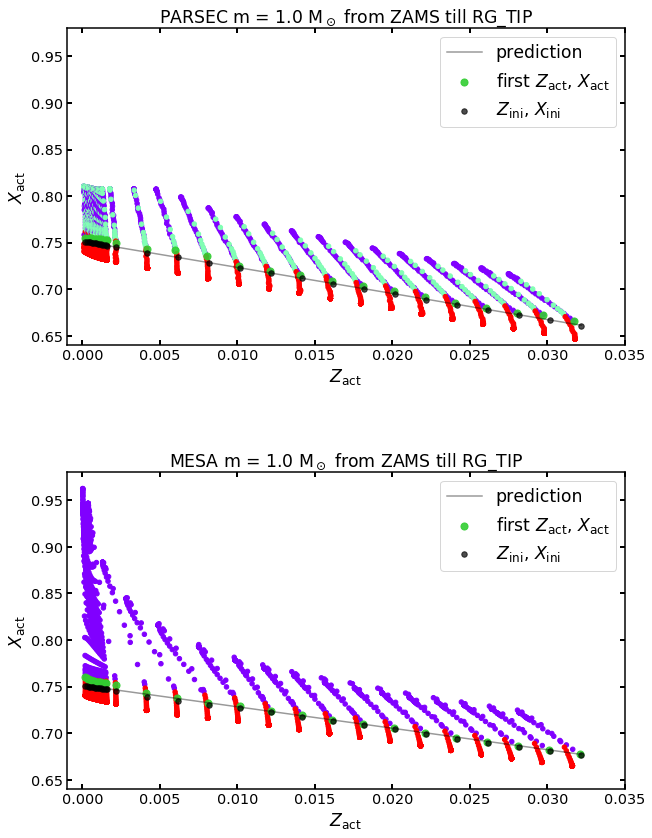

In [20]:
fig, axs = plt.subplots(2, 1, figsize=(10, 14))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

cm = plt.get_cmap('rainbow')

ax=axs[0]
parsec_3[parsec_3.label.isin([1,2,3])].query('Mini==1.0').plot.scatter('Zact_st', 'X', ax=ax,
                                                                       c='label', cmap=cm, vmin=1, vmax=3,
                                                                       colorbar=False) #n==80 and 

parsec_int.plot('Z', 'Xpred', ax=ax, color='black', alpha=0.4, label='prediction')

lab = 'first $Z_\mathrm{act}$, $X_\mathrm{act}$'
i=0
leg=True
for z in parsec_3.index.get_level_values('Zini').unique():
    if (i>0):
        lab = ''
        leg = False
    parsec_3.query('label==1 and Mini==1.0 and Zini==@z').iloc[0:1 , :].plot.scatter('Zact_st', 'X',
                                                                                     c='limegreen',
                                                                                     s=50, ax=ax, alpha=0.9,
                                                                                     label=lab, legend=leg)

    i+=1
    
parsec_3.query('n==1 and Mini==1.0').plot.scatter('Zini_st', 'Xini', c='black',
                                                  s=30, ax=ax, alpha=0.7,
                                                 label='$Z_\mathrm{ini}$, $X_\mathrm{ini}$')

ax.set_title('PARSEC m = 1.0 M$_\odot$ from ZAMS till RG_TIP')

ax=axs[1]
mesa_diff_3[mesa_diff_3.label.isin([1,2,3])].query('Mini==1.0').plot.scatter('Zact_st', 'X', ax=ax,
                                                                       c='label', cmap=cm, vmin=1, vmax=3,
                                                                       colorbar=False) #n==80 and 

mesa_int.plot('Z', 'Xpred', ax=ax, color='black', alpha=0.4, label='prediction')

lab = 'first $Z_\mathrm{act}$, $X_\mathrm{act}$'
i=0
leg=True
for z in mesa_diff_3.index.get_level_values('Zini').unique():
    if (i>0):
        lab = ''
        leg = False
    mesa_diff_3.query('Mini==1.0 and Zini==@z and age==0.0').plot.scatter('Zact_st', 'X',
                                                                                     c='limegreen',
                                                                                     s=50, ax=ax, alpha=0.9,
                                                                                     label=lab, legend=leg)
#.iloc[0:1 , :] .iloc[0:1 , :]
    i+=1
    



#mesa_diff_3.query('n==1 and Mini==1.0').plot.scatter('Zact_st', 'X', c='limegreen',
#                                                     s=50, ax=ax, alpha=0.9,
#                                                   label='first $Z_\mathrm{act}$, $X_\mathrm{act}$')
mesa_diff_3.query('n==1 and Mini==1.0').plot.scatter('Zini_st', 'Xini', c='black',
                                                     s=30, ax=ax, alpha=0.7,
                                                    label='$Z_\mathrm{ini}$, $X_\mathrm{ini}$')

ax.set_title('MESA m = 1.0 M$_\odot$ from ZAMS till RG_TIP')

for ax in axs:
    ax.tick_params(axis='both', direction='in', top=True, right=True)
    ax.set_xlim([-0.001, 0.035])
    ax.set_ylim([0.64,0.98])
    ax.set_ylabel('$X_\mathrm{act}$')
    ax.set_xlabel('$Z_\mathrm{act}$')
plt.show()

Same as \ref{fig:Xact_Zact1}, but for evolutionary tracks with 1.8 $M_\odot$.

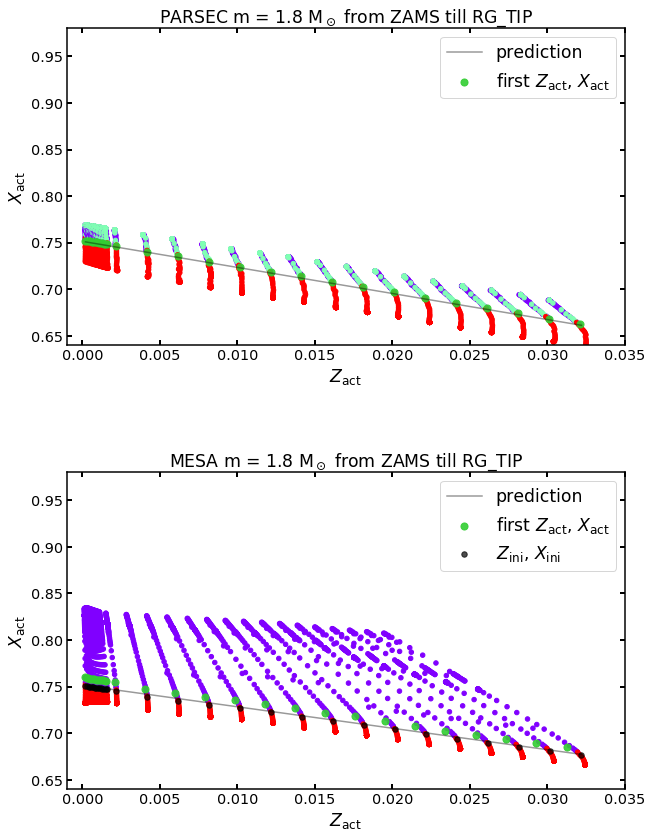

In [21]:
fig, axs = plt.subplots(2, 1, figsize=(10, 14))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

cm = plt.get_cmap('rainbow')

ax=axs[0]
parsec_3[parsec_3.label.isin([1,2,3])].query('Mini==1.8').plot.scatter('Zact_st', 'X', ax=ax,
                                                                       c='label', cmap=cm, vmin=1, vmax=3,
                                                                       colorbar=False) #n==80 and 

parsec_int.plot('Z', 'Xpred', ax=ax, color='black', alpha=0.4, label='prediction')
#parsec_3.query('label==1 and Mini==1.8').iloc[0:1 , :].plot.scatter('Zact_st', 'X', c='limegreen',
#                                                  s=50, ax=ax, alpha=0.9,
#                                                 label='first $Z_\mathrm{act}$, $X_\mathrm{act}$')
lab = 'first $Z_\mathrm{act}$, $X_\mathrm{act}$'
i=0
leg=True
for z in parsec_3.index.get_level_values('Zini').unique():
    if (i>0):
        lab = ''
        leg = False
    parsec_3.query('label==1 and Mini==1.8 and Zini==@z').iloc[0:1 , :].plot.scatter('Zact_st', 'X',
                                                                                     c='limegreen',
                                                                                     s=50, ax=ax, alpha=0.9,
                                                                                     label=lab, legend=leg)

    i+=1

#parsec_3.query('n==1 and Mini==1.8').plot.scatter('Zini_st', 'Xini', c='black',
#                                                  s=30, ax=ax, alpha=0.7,
#                                                 label='$Z_\mathrm{ini}$, $X_\mathrm{ini}$')

ax.set_title('PARSEC m = 1.8 M$_\odot$ from ZAMS till RG_TIP')

ax=axs[1]
mesa_diff_3[mesa_diff_3.label.isin([1,2,3])].query('Mini==1.8').plot.scatter('Zact_st', 'X', ax=ax,
                                                                       c='label', cmap=cm, vmin=1, vmax=3,
                                                                       colorbar=False) #n==80 and 

mesa_int.plot('Z', 'Xpred', ax=ax, color='black', alpha=0.4, label='prediction')
#mesa_diff_3.query('n==1 and Mini==1.8').plot.scatter('Zact_st', 'X', c='limegreen',
#                                                     s=50, ax=ax, alpha=0.9,
#                                                    label='first $Z_\mathrm{act}$, $X_\mathrm{act}$')

lab = 'first $Z_\mathrm{act}$, $X_\mathrm{act}$'
i=0
leg=True
for z in mesa_diff_3.index.get_level_values('Zini').unique():
    if (i>0):
        lab = ''
        leg = False
    mesa_diff_3.query('Mini==1.8 and Zini==@z and age<0.1').plot.scatter('Zact_st', 'X',
                                                                                     c='limegreen',
                                                                                     s=50, ax=ax, alpha=0.9,
                                                                                     label=lab, legend=leg)
#iloc[0:1 , :] .iloc[-2:-1 , :]
    i+=1

mesa_diff_3.query('n==1 and Mini==1.8').plot.scatter('Zini_st', 'Xini', c='black',
                                                     s=30, ax=ax, alpha=0.7,
                                                    label='$Z_\mathrm{ini}$, $X_\mathrm{ini}$')

ax.set_title('MESA m = 1.8 M$_\odot$ from ZAMS till RG_TIP')

for ax in axs:
    ax.tick_params(axis='both', direction='in', top=True, right=True)
    ax.set_xlim([-0.001, 0.035])
    ax.set_ylim([0.64,0.98])
    ax.set_ylabel('$X_\mathrm{act}$')
    ax.set_xlabel('$Z_\mathrm{act}$')
plt.show()

In [22]:
# Fitting log10
from scipy.optimize import curve_fit

def blogx_a(x, a, b, c):
    return b *log10x_a(x/a) + c
    
def log10x_a(x, a):#, b, c):
    #print(np.log10(x/a))
    return np.log10(x/a)


tabs = (parsec_tab, mesa_tab)
tests = (parsec_int, mesa_int)
for tab, test in zip(tabs, tests):
    # TRAIN
    X_train = tab.Z
    y_train = tab.FeH

    # TEST
    X_test = test.Z
    y_test = test.FeH

    # Fit
    popt, pcov = curve_fit(log10x_a, X_train, y_train)
    print(popt)
    # Make predictions using the testing set
    test['FeH_pred'] = log10x_a(X_test, popt)
    #break


[0.01470185]
[0.01762843]


/home/thaise/anaconda3/envs/ipyreport/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in log10
  if __name__ == '__main__':


# Interpolation of [Fe/H]

The metallicity [Fe/H] is interpolated linearly:

\begin{equation}
[Fe/H] = f_1 [Fe/H]_{1} + f [Fe/H]_{2}
\nonumber
\end{equation}

Figure \ref{fig:FeHini_Zini} shows $[Fe/H]_\mathrm{ini}$-$Z_\mathrm{ini}$ relation with grid and interpolated values in black and orange filled circles. The gray line in each panel is a logarithm curve fitting [Fe/H] = $\log{Z/Z_\odot}$ using grid values, where PARSEC $Z_\odot$ is equal to 0.0147 and MESA is 0.0176.

$[Fe/H]_\mathrm{ini}$-$Z_\mathrm{ini}$ relation with grid and interpolated values in black and orange filled circles. The gray line is a logarithm curve fitting [Fe/H] = $\log{Z/Z_\odot}$ using grid values, PARSEC $Z_\odot$ is equal to 0.0147 and MESA is 0.0176.

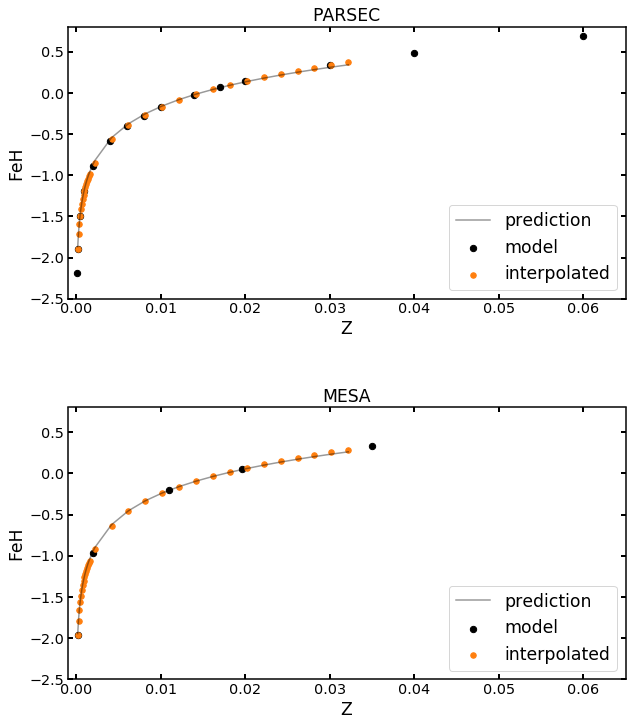

In [23]:
fig, axs = plt.subplots(2, 1, figsize=(10, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax=axs[0]
parsec_tab.plot.scatter('Z', 'FeH', ax=ax, color='black', s=40, label='model')
parsec_int.plot('Z', 'FeH_pred', ax=ax, color='black', alpha=0.4, label='prediction')
parsec_int.plot.scatter('Z', 'FeH', ax=ax, color='C1', label='interpolated', s=30)

ax.set_title('PARSEC')

ax=axs[1]
mesa_tab.plot.scatter('Z', 'FeH', ax=ax, color='black', s=40, label='model')
mesa_int.plot('Z', 'FeH_pred', ax=ax, color='black', alpha=0.4, label='prediction')
mesa_int.plot.scatter('Z', 'FeH', ax=ax, color='C1', label='interpolated', s=30)
#ax.plot(mesa_int.Z, (0.75150161-2.30076802*mesa_int.Z), color='red', alpha=0.4, label='prediction')

ax.set_title('MESA')

for ax in axs:
    ax.tick_params(axis='both', direction='in', top=True, right=True)
    ax.set_xlim([-0.001, 0.065])
    ax.set_ylim([-2.5,0.8])
    ax.legend(loc=4)
plt.show()

In [24]:
# Computing predicted - interpolated
tests = (parsec_int, mesa_int)
for test in tests:
    test['diffFeH'] = test.FeH_pred - test.FeH

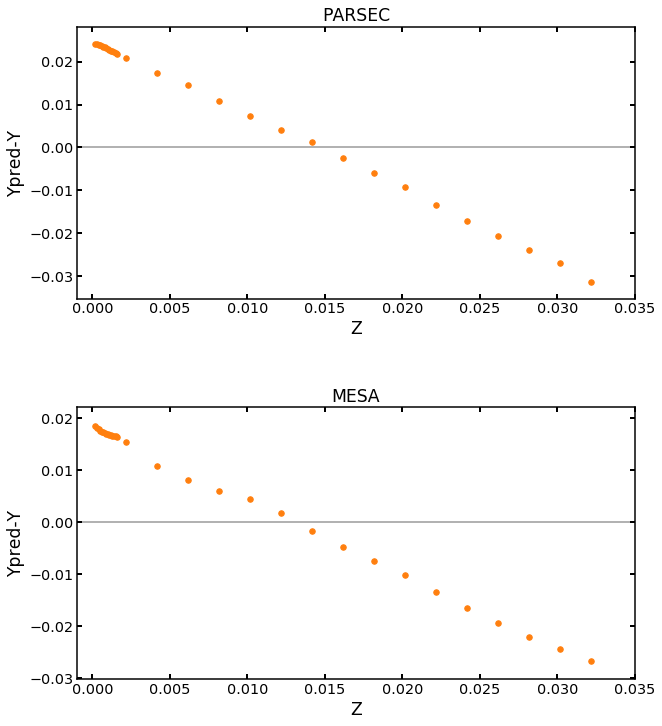

In [25]:
fig, axs = plt.subplots(2, 1, figsize=(10, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax=axs[0]
#parsec_tab.plot.scatter('Z', 'diffX', ax=ax, color='black', s=40, label='model')
ax.plot([-1,1], [0,0], color='black', alpha=0.4, label='prediction')
parsec_int.plot.scatter('Z', 'diffFeH', ax=ax, color='C1', s=30)

ax.set_title('PARSEC')

ax=axs[1]
#mesa_tab.plot.scatter('Z', 'X', ax=ax, color='black', s=40, label='model')
#mesa_int.plot('Z', 'Xpred', ax=ax, color='black', alpha=0.4, label='prediction')
ax.plot([-1,1], [0,0], color='black', alpha=0.4, label='prediction')
mesa_int.plot.scatter('Z', 'diffFeH', ax=ax, color='C1', s=30)

ax.set_title('MESA')

for ax in axs:
    ax.tick_params(axis='both', direction='in', top=True, right=True)
    ax.set_xlim([-0.001, 0.035])
    #ax.set_ylim([-0.0035,0.0035])
    ax.set_ylabel('Ypred-Y')
plt.show()

# Interpolation of $X_C$, $X_N$, $X_O$

The Carbon $X_C$, Nitrogen $X_N$, and Oxygen $X_O$ mass fraction are interpolated as follows:

\begin{equation}   
X_\mathrm{C} = \left( f_1 \frac{X_\mathrm{C1}}{Z_\mathrm{act1}} + f \frac{X_\mathrm{C2}}{Z_\mathrm{act2}} \right) Z_\mathrm{act}   
\nonumber   
\end{equation}
\begin{equation}
X_\mathrm{N} = \left( f_1 \frac{X_\mathrm{N1}}{Z_\mathrm{act1}} + f \frac{X_\mathrm{N2}}{Z_\mathrm{act2}} \right) Z_\mathrm{act}   
\nonumber   
\end{equation}
\begin{equation}
X_\mathrm{O} = \left( f_1 \frac{X_\mathrm{O1}}{Z_\mathrm{act1}} + f \frac{X_\mathrm{O2}}{Z_\mathrm{act2}} \right) Z_\mathrm{act}   
\nonumber   
\end{equation}   

In this way they will keep the proportion and also the sum $X_\mathrm{C}+X_\mathrm{N}+X_\mathrm{O}$ will be smaller than $Z_\mathrm{act}$.

NO TEST WAS DONE WITH THESE VALUES, SO PLEASE BE CAUTIOUS WHEN USING IT.

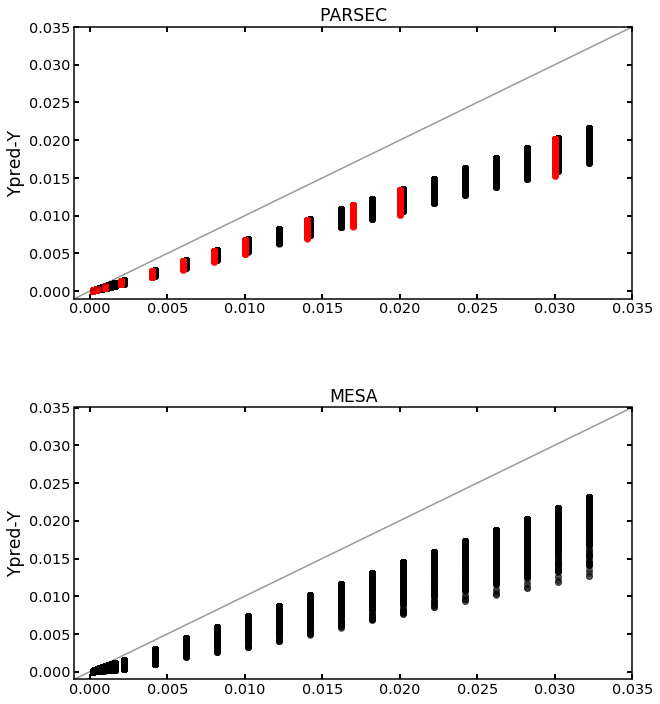

In [26]:
fig, axs = plt.subplots(2, 1, figsize=(10, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

ax=axs[0]
#parsec_tab.plot.scatter('Z', 'diffX', ax=ax, color='black', s=40, label='model')
ax.plot([-1,1], [-1,1], color='black', alpha=0.4, label='prediction')
#parsec_3.plot.scatter('Z', 'diffFeH', ax=ax, color='C1', s=30)
ax.scatter(parsec_3.Zini_st, (parsec_3.Xc+parsec_3.Xn+parsec_3.Xo), color='black', alpha=0.4, label='prediction')
ax.scatter(parsec_mod.Zini_st, (parsec_mod.Xc+parsec_mod.Xn+parsec_mod.Xo), color='red', alpha=0.4, label='prediction')

ax.set_title('PARSEC')

ax=axs[1]
#mesa_tab.plot.scatter('Z', 'X', ax=ax, color='black', s=40, label='model')
#mesa_int.plot('Z', 'Xpred', ax=ax, color='black', alpha=0.4, label='prediction')
ax.plot([-1,1], [-1,1], color='black', alpha=0.4, label='prediction')
#mesa_int.plot.scatter('Z', 'diffFeH', ax=ax, color='C1', s=30)
ax.scatter(mesa_diff_3.Zini_st, (mesa_diff_3.Xc+mesa_diff_3.Xn+mesa_diff_3.Xo),
           color='black', alpha=0.4, label='prediction')

ax.set_title('MESA')

for ax in axs:
    ax.tick_params(axis='both', direction='in', top=True, right=True)
    ax.set_xlim([-0.001, 0.035])
    ax.set_ylim([-0.001,0.035])
    ax.set_ylabel('Ypred-Y')
plt.show()

In [27]:
# Some points in PARSEC tracks still have XC+XN+XO > Zact:
# WILL BE FIXED in future releases
parsec_3[((parsec_3.Xc+parsec_3.Xn+parsec_3.Xo) > parsec_3.Zact_st)].shape

(75, 39)

In [28]:
mesa_diff_3[((mesa_diff_3.Xc+mesa_diff_3.Xn+mesa_diff_3.Xo) > mesa_diff_3.Zact_st)].shape

(0, 43)

In [29]:
pd.set_option('display.max_rows', None)
parsec_mod[((parsec_mod.Xc+parsec_mod.Xn+parsec_mod.Xo) > parsec_mod.Zact_st)]

age  Mass     logL    logTe  logg  label      logR  \
Mini Zini   n                                                                  
0.60 0.0002 72   4.033422e+09  0.60 -0.72836  3.71789   0.0      1 -0.275960   
            81   1.203302e+10  0.60 -0.61481  3.72946   0.0      1 -0.242325   
            86   1.613473e+10  0.60 -0.53923  3.73789   0.0      1 -0.221395   
            87   1.701630e+10  0.60 -0.52080  3.73985   0.0      1 -0.216100   
0.65 0.0002 74   3.669309e+09  0.65 -0.56104  3.74088   0.0      1 -0.238280   
            84   9.997128e+09  0.65 -0.43876  3.75397   0.0      1 -0.203320   
            87   1.201308e+10  0.65 -0.39038  3.75870   0.0      1 -0.188590   
            71   3.669309e+09  0.65 -0.56104  3.74088   0.0      1 -0.238280   
            73   5.243993e+09  0.65 -0.53377  3.74393   0.0      1 -0.230745   
            74   5.872748e+09  0.65 -0.52241  3.74519   0.0      1 -0.227585   
            75   6.768596e+09  0.65 -0.50567  3.74701   0.0      1 -0.222855   
            80   1.091443e+10  0.65 -0.41746  3.75610   0.0      1 -0.196930   
            106  2.402043e+10  0.65  0.48402  3.74840   0.0      2  0.269210   
            108  2.414706e+10  0.65  0.56968  3.74100   0.0      2  0.326840   
            110  2.419797e+10  0.65  0.61035  3.73866   0.0      3  0.351855   
            116  2.447699e+10  0.65  0.87068  3.73085   0.0      3  0.497640   
0.70 0.0002 72   4.166167e+09  0.70 -0.38294  3.76527   0.0      1 -0.198010   
            73   4.730634e+09  0.70 -0.36988  3.76653   0.0      1 -0.194000   
            78   7.413510e+09  0.70 -0.30174  3.77281   0.0      1 -0.172490   
            79   7.906957e+09  0.70 -0.28782  3.77405   0.0      1 -0.168010   
            80   8.631715e+09  0.70 -0.26640  3.77591   0.0      1 -0.161020   
            107  1.862273e+10  0.70  0.61365  3.74735   0.0      2  0.336125   
0.75 0.0002 78   4.326991e+09  0.75 -0.21424  3.78700   0.0      1 -0.157120   
            79   4.828536e+09  0.75 -0.19858  3.78816   0.0      1 -0.151610   
            80   5.314666e+09  0.75 -0.18277  3.78933   0.0      1 -0.146045   
            82   6.240732e+09  0.75 -0.15072  3.79163   0.0      1 -0.134620   
            109  1.451571e+10  0.75  0.63837  3.76216   0.0      2  0.318865   
            110  1.455922e+10  0.75  0.67104  3.75563   0.0      2  0.348260   
            125  1.491545e+10  0.75  1.33324  3.72537   0.0      3  0.739880   
0.80 0.0002 81   4.147482e+09  0.80 -0.05917  3.80484   0.0      1 -0.115265   
            82   4.551795e+09  0.80 -0.04248  3.80601   0.0      1 -0.109260   
            83   4.955143e+09  0.80 -0.02510  3.80719   0.0      1 -0.102930   
            84   5.347829e+09  0.80 -0.00738  3.80832   0.0      1 -0.096330   
            85   5.732111e+09  0.80  0.01077  3.80945   0.0      1 -0.089515   
            111  1.163418e+10  0.80  0.75234  3.75843   0.0      2  0.383310   
            115  1.172275e+10  0.80  0.87121  3.74400   0.0      3  0.471605   
0.85 0.0002 76   1.744511e+09  0.85 -0.01212  3.81514   0.0      1 -0.112340   
            79   2.920202e+09  0.85  0.03912  3.81881   0.0      1 -0.094060   
            81   3.649036e+09  0.85  0.07433  3.82118   0.0      1 -0.081195   
            88   5.863056e+09  0.85  0.20737  3.82899   0.0      1 -0.030295   
            89   6.114707e+09  0.85  0.22685  3.83002   0.0      1 -0.022615   
            108  9.396876e+09  0.85  0.80604  3.77140   0.0      2  0.384220   
            119  9.622185e+09  0.85  1.26279  3.73127   0.0      3  0.692855   
0.90 0.0002 77   2.009711e+09  0.90  0.12988  3.83245   0.0      1 -0.075960   
            81   3.272350e+09  0.90  0.20129  3.83738   0.0      1 -0.050115   
            87   4.800172e+09  0.90  0.31406  3.84441   0.0      1 -0.007790   
            91   5.884729e+09  0.90  0.43112  3.85112   0.0      1  0.037320   
            92   6.116487e+09  0.90  0.46237  3.85265   0.0      1  0.049885   
            95   6.778210e

To convert this notebook, first you need to access the conda enviroment "ipyreport":

$ source activate ipyreport

Then run:

$ nbpublish -pdf --pdf-debug -lb -f latex_ipypublish_nocode Interpol.ipynb

You can try to use also 'latex__ipypublish_main'